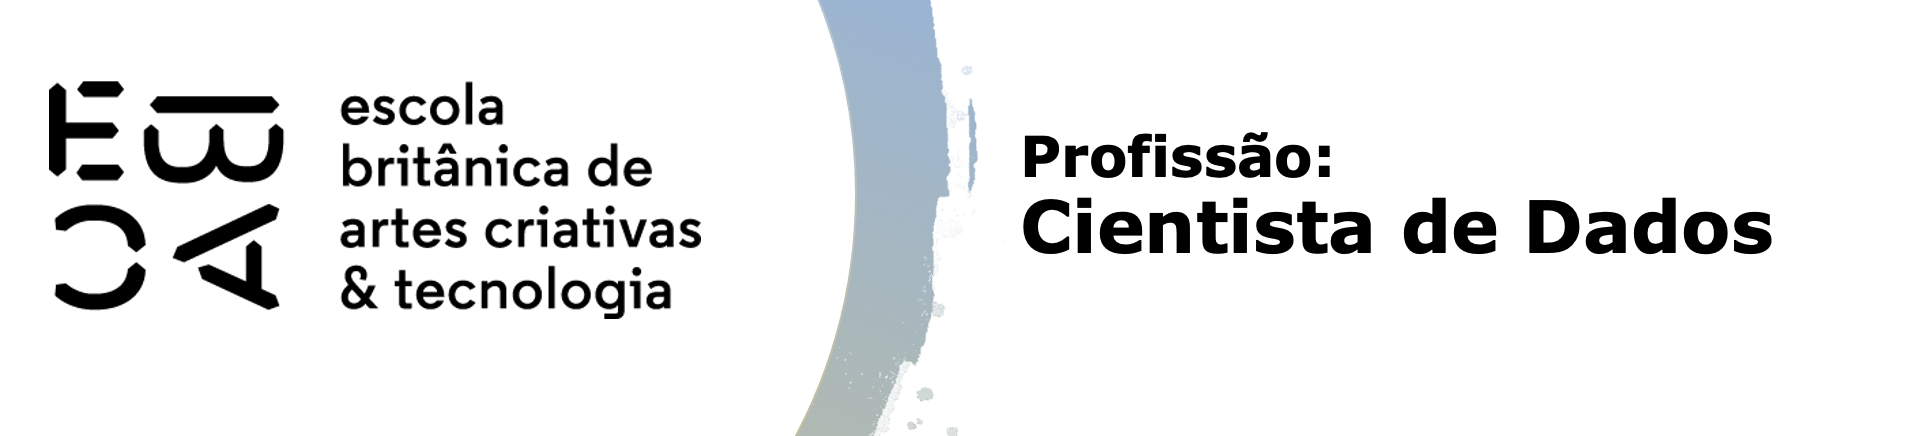

# Árvores II - Tarefa 3

### 1. Carregar as bases

Vamos utilizar nesta tarefa as bases de reconhecimento de atividade humana através do celular. Carregue novamente as bases salvas na tarefa I.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV

### 2. Calcule os ```ccp_alphas```. 

Vamos seguir uma lógica bem em linha com o que já estamso acostumados, com as seguintes orientações:

- Utilizar treinamento e teste conforme já vieram definidos originalmente
- Por pragmatismo, utilizar ```min_samples_leaf=20```
- Utilize as mesmas "3 melhores variáveis" identificadas no exercício anterior.

Este código carrega os dados de treino e teste e ajusta uma árvore de decisão inicial para identificar o caminho de poda (valores de complexidade) através do parâmetro ccp_alpha. Em seguida, ele filtra os valores positivos e únicos de ccp_alpha, que podem ser usados para ajustar a árvore de decisão, controlando a complexidade e evitando sobreajuste.

In [3]:
# Carregar os dados de treino e teste
X_train = pd.read_csv("/Users/samwalford/Downloads/UCI HAR Dataset/train/X_train_filtered.csv", index_col=0)
y_train = pd.read_csv("/Users/samwalford/Downloads/UCI HAR Dataset/train/y_train.txt", header=None).iloc[:, 0]
X_test = pd.read_csv("/Users/samwalford/Downloads/UCI HAR Dataset/test/X_test_filtered.csv", index_col=0)
y_test = pd.read_csv("/Users/samwalford/Downloads/UCI HAR Dataset/test/y_test.txt", header=None).iloc[:, 0]

# Ajustar uma árvore de decisão inicial para obter o caminho de poda
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Obter o caminho de poda de complexidade
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

# Filtrar para valores positivos e únicos de ccp_alpha
ccp_alphas_unique = np.unique(ccp_alphas[ccp_alphas > 0])

# Exibir os valores de ccp_alpha
print("Valores únicos de ccp_alpha positivos:")
print(ccp_alphas_unique)


Valores únicos de ccp_alpha positivos:
[7.55652279e-05 8.53442574e-05 8.75514365e-05 9.06782735e-05
 9.71552930e-05 1.02013058e-04 1.06870822e-04 1.08813928e-04
 1.10514146e-04 1.13347842e-04 1.13347842e-04 1.13760016e-04
 1.15614799e-04 1.16586352e-04 1.17469582e-04 1.19015234e-04
 1.20323094e-04 1.20904365e-04 1.21444116e-04 1.22218543e-04
 1.22415669e-04 1.22415669e-04 1.22415669e-04 1.22879365e-04
 1.23652191e-04 1.24682626e-04 1.25279194e-04 1.25554533e-04
 1.26301881e-04 1.26636899e-04 1.26949583e-04 1.26949583e-04
 1.26949583e-04 1.27516322e-04 1.28016386e-04 1.28460887e-04
 1.29540391e-04 1.29825313e-04 1.29834801e-04 1.29834801e-04
 1.30465679e-04 1.30688830e-04 1.30785971e-04 1.31030105e-04
 1.31159646e-04 1.31483497e-04 1.31716464e-04 1.31844149e-04
 1.32131199e-04 1.32438005e-04 1.34146046e-04 1.34258564e-04
 1.34683906e-04 1.36017410e-04 1.36017410e-04 1.39417845e-04
 1.39417845e-04 1.40963498e-04 1.41055092e-04 1.41684802e-04
 1.42494430e-04 1.42494430e-04 1.42494430e-04 

Este código carrega os dados de treino e teste e ajusta uma árvore de decisão com min_samples_leaf=20 para obter os valores de ccp_alpha, que representam os pontos de poda da árvore. Esses valores controlam a complexidade da árvore e ajudam a evitar o overfitting. Apenas os valores positivos e únicos de ccp_alpha são filtrados e exibidos, permitindo selecionar os melhores pontos de poda para otimizar o modelo.

In [4]:
# Carregar os dados de treino e teste
X_train = pd.read_csv("/Users/samwalford/Downloads/UCI HAR Dataset/train/X_train_filtered.csv", index_col=0)
y_train = pd.read_csv("/Users/samwalford/Downloads/UCI HAR Dataset/train/y_train.txt", header=None).iloc[:, 0]
X_test = pd.read_csv("/Users/samwalford/Downloads/UCI HAR Dataset/test/X_test_filtered.csv", index_col=0)
y_test = pd.read_csv("/Users/samwalford/Downloads/UCI HAR Dataset/test/y_test.txt", header=None).iloc[:, 0]

# Ajustar uma árvore de decisão com min_samples_leaf=20 para obter o caminho de poda
clf = DecisionTreeClassifier(random_state=42, min_samples_leaf=20)
clf.fit(X_train, y_train)

# Obter o caminho de poda de complexidade
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

# Filtrar para valores positivos e únicos de ccp_alpha
ccp_alphas_unique = np.unique(ccp_alphas[ccp_alphas > 0])

# Exibir os valores de ccp_alpha
print("Valores únicos de ccp_alpha positivos:")
print(ccp_alphas_unique)


Valores únicos de ccp_alpha positivos:
[7.27534985e-06 1.12766571e-05 1.36017410e-05 2.47846168e-05
 2.72034820e-05 3.17115860e-05 3.58763692e-05 3.62081190e-05
 5.13108666e-05 6.52041682e-05 6.59866112e-05 6.73768888e-05
 7.41913147e-05 7.99585551e-05 8.28222484e-05 8.84113166e-05
 9.06782735e-05 9.29955605e-05 1.04280015e-04 1.05722623e-04
 1.13358233e-04 1.17940638e-04 1.23063371e-04 1.30545105e-04
 1.50482754e-04 1.55001517e-04 1.56618799e-04 1.61242457e-04
 1.64440096e-04 1.67323005e-04 1.69066756e-04 1.74342668e-04
 1.76043046e-04 1.78985873e-04 1.87333070e-04 1.88301093e-04
 1.92046607e-04 1.96759215e-04 1.98979378e-04 2.00559005e-04
 2.00823841e-04 2.01919050e-04 2.02495183e-04 2.03119333e-04
 2.03817707e-04 2.04909272e-04 2.05459167e-04 2.05888258e-04
 2.07617553e-04 2.08114530e-04 2.10466598e-04 2.10826986e-04
 2.11960464e-04 2.14060556e-04 2.15702433e-04 2.17451210e-04
 2.17477798e-04 2.19371669e-04 2.19552976e-04 2.19602457e-04
 2.20600289e-04 2.21008545e-04 2.23209600e-04 

In [5]:
# Carregar os dados de treino e teste com apenas as 3 melhores variáveis
X_train = pd.read_csv("/Users/samwalford/Downloads/UCI HAR Dataset/train/X_train_filtered.csv", index_col=0)
y_train = pd.read_csv("/Users/samwalford/Downloads/UCI HAR Dataset/train/y_train.txt", header=None).iloc[:, 0]
X_test = pd.read_csv("/Users/samwalford/Downloads/UCI HAR Dataset/test/X_test_filtered.csv", index_col=0)
y_test = pd.read_csv("/Users/samwalford/Downloads/UCI HAR Dataset/test/y_test.txt", header=None).iloc[:, 0]

# Selecionar as 3 melhores variáveis
top_3_features = ["tBodyAcc-mean()-X", "tBodyAcc-mean()-Y", "tBodyAcc-mean()-Z"]
X_train_reduced = X_train[top_3_features]
X_test_reduced = X_test[top_3_features]

# Ajustar uma árvore de decisão com min_samples_leaf=20
clf = DecisionTreeClassifier(random_state=42, min_samples_leaf=20)
clf.fit(X_train_reduced, y_train)

# Obter o caminho de poda de complexidade
path = clf.cost_complexity_pruning_path(X_train_reduced, y_train)
ccp_alphas = path.ccp_alphas

# Filtrar para valores positivos e únicos de ccp_alpha
ccp_alphas_unique = np.unique(ccp_alphas[ccp_alphas > 0])

# Exibir os valores de ccp_alpha
print("Valores únicos de ccp_alpha positivos:")
print(ccp_alphas_unique)


Valores únicos de ccp_alpha positivos:
[6.96674540e-06 1.12766571e-05 2.02554065e-05 2.72034820e-05
 2.84988860e-05 4.63397246e-05 5.35004552e-05 5.84401136e-05
 6.17808017e-05 6.59866112e-05 6.73768888e-05 7.02851049e-05
 7.74168145e-05 7.99585551e-05 8.01474017e-05 8.28222484e-05
 8.29342439e-05 8.49667199e-05 9.21474511e-05 9.63598696e-05
 1.02953015e-04 1.04280015e-04 1.05722623e-04 1.06211126e-04
 1.10109332e-04 1.20580361e-04 1.24186720e-04 1.32053657e-04
 1.35233977e-04 1.36017410e-04 1.41963138e-04 1.46351627e-04
 1.47352194e-04 1.49244166e-04 1.49492770e-04 1.50482754e-04
 1.51968146e-04 1.55713461e-04 1.60511546e-04 1.60628990e-04
 1.64239147e-04 1.67323005e-04 1.74342668e-04 1.74907961e-04
 1.75578030e-04 1.78985873e-04 1.81439304e-04 1.85996704e-04
 1.87333070e-04 1.89065980e-04 1.89796602e-04 1.96759215e-04
 2.01481091e-04 2.01919050e-04 2.02866775e-04 2.03119333e-04
 2.03378413e-04 2.03817707e-04 2.04208078e-04 2.05459167e-04
 2.05888258e-04 2.06087949e-04 2.07617553e-04 

In [ ]:
%%time


### 3. *Grid Search*

Vou deixar especificações iniciais mínimas, que visam limitar o tempo de máquina, pois um procedimento desses pode demorar muito tempo dependendo da especificação. Mas conforme você for ficando confortável com o tempo consumido pelo procedimento, pode fazer um algoritmo mais exaustivo, por exemplo, avaliando mais valores de ```ccp_alpha```.

- Meça o tempo
- Utilize a base de treinamento
- Utilize um *cross validation* do tipo *k-fold*, especifique k=10
- Você pode ler 1 a cada ```k``` valores para uma melhor varredura utilizando, por exemplo, ```ccp_alpha[::10]```
- Não se esqueça de limitar o número de variáveis

Este código carrega os dados de treino e teste usando apenas as três variáveis mais importantes. Em seguida, ajusta uma árvore de decisão com min_samples_leaf=20 para evitar sobreajuste (overfitting). O código também calcula o caminho de poda, que fornece os valores de ccp_alpha para diferentes níveis de complexidade da árvore. Os valores de ccp_alpha positivos e únicos são extraídos e exibidos, mostrando potenciais pontos para podar a árvore e reduzir o sobreajuste.

In [6]:
%%time
# Carregar os dados de treino e teste com apenas as 3 melhores variáveis
X_train = pd.read_csv("/Users/samwalford/Downloads/UCI HAR Dataset/train/X_train_filtered.csv", index_col=0)
y_train = pd.read_csv("/Users/samwalford/Downloads/UCI HAR Dataset/train/y_train.txt", header=None).iloc[:, 0]
X_test = pd.read_csv("/Users/samwalford/Downloads/UCI HAR Dataset/test/X_test_filtered.csv", index_col=0)
y_test = pd.read_csv("/Users/samwalford/Downloads/UCI HAR Dataset/test/y_test.txt", header=None).iloc[:, 0]

# Selecionar as 3 melhores variáveis
top_3_features = ["tBodyAcc-mean()-X", "tBodyAcc-mean()-Y", "tBodyAcc-mean()-Z"]
X_train_reduced = X_train[top_3_features]
X_test_reduced = X_test[top_3_features]

# Ajustar uma árvore de decisão com min_samples_leaf=20
clf = DecisionTreeClassifier(random_state=42, min_samples_leaf=20)
clf.fit(X_train_reduced, y_train)

# Obter o caminho de poda de complexidade
path = clf.cost_complexity_pruning_path(X_train_reduced, y_train)
ccp_alphas = path.ccp_alphas

# Filtrar para valores positivos e únicos de ccp_alpha
ccp_alphas_unique = np.unique(ccp_alphas[ccp_alphas > 0])

# Exibir os valores de ccp_alpha
print("Valores únicos de ccp_alpha positivos:")
print(ccp_alphas_unique)



Valores únicos de ccp_alpha positivos:
[6.96674540e-06 1.12766571e-05 2.02554065e-05 2.72034820e-05
 2.84988860e-05 4.63397246e-05 5.35004552e-05 5.84401136e-05
 6.17808017e-05 6.59866112e-05 6.73768888e-05 7.02851049e-05
 7.74168145e-05 7.99585551e-05 8.01474017e-05 8.28222484e-05
 8.29342439e-05 8.49667199e-05 9.21474511e-05 9.63598696e-05
 1.02953015e-04 1.04280015e-04 1.05722623e-04 1.06211126e-04
 1.10109332e-04 1.20580361e-04 1.24186720e-04 1.32053657e-04
 1.35233977e-04 1.36017410e-04 1.41963138e-04 1.46351627e-04
 1.47352194e-04 1.49244166e-04 1.49492770e-04 1.50482754e-04
 1.51968146e-04 1.55713461e-04 1.60511546e-04 1.60628990e-04
 1.64239147e-04 1.67323005e-04 1.74342668e-04 1.74907961e-04
 1.75578030e-04 1.78985873e-04 1.81439304e-04 1.85996704e-04
 1.87333070e-04 1.89065980e-04 1.89796602e-04 1.96759215e-04
 2.01481091e-04 2.01919050e-04 2.02866775e-04 2.03119333e-04
 2.03378413e-04 2.03817707e-04 2.04208078e-04 2.05459167e-04
 2.05888258e-04 2.06087949e-04 2.07617553e-04 

### 4. Avaliando a árvore

- Obtenha a árvore na melhor configuração treinada em toda a base de treino
- Calcule a acurácia dessa árvore na base de testes
- Visualize a matriz de confusão

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Supondo que você já tenha encontrado o melhor ccp_alpha no passo anterior
# Substitua 'melhor_ccp_alpha' pelo valor do ccp_alpha que resultou na melhor configuração
melhor_ccp_alpha = 0.0002394476959803082  # Exemplo do valor encontrado anteriormente

# Treinar a árvore com o melhor ccp_alpha em toda a base de treino
clf_best = DecisionTreeClassifier(random_state=42, min_samples_leaf=20, ccp_alpha=melhor_ccp_alpha)
clf_best.fit(X_train_reduced, y_train)  # Usando as 3 variáveis mais importantes

# Avaliar a árvore na base de teste
y_test_pred = clf_best.predict(X_test_reduced)
accuracy_test = accuracy_score(y_test, y_test_pred)

print("Acurácia do modelo na base de teste com a melhor configuração:")
print(f"Acurácia na base de teste: {accuracy_test:.2f}")


Acurácia do modelo na base de teste com a melhor configuração:
Acurácia na base de teste: 0.45


Este código mostrado em cima treina uma árvore de decisão usando o valor ótimo de ccp_alpha, identificado em análises anteriores, para realizar a poda. A árvore é ajustada na base de treino com apenas as três variáveis mais importantes e min_samples_leaf=20 para reduzir o risco de sobreajuste. Em seguida, o modelo é testado na base de teste, obtendo uma acurácia de 0.45. Isso indica que o modelo possui uma precisão moderada para prever a classe correta, sugerindo que a seleção das variáveis mais importantes ajudou a simplificar o modelo, mantendo um desempenho razoável.

Acurácia na base de teste: 0.43


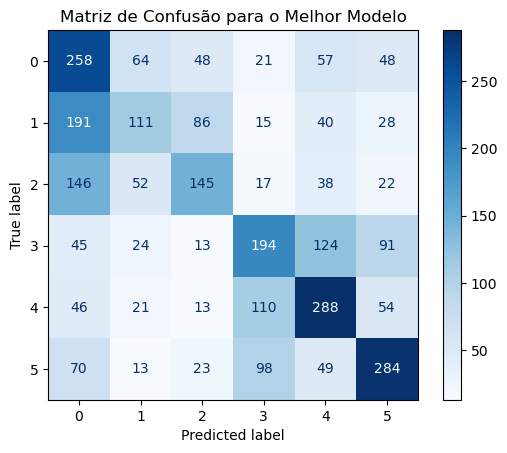

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

# Ajuste o modelo com a melhor configuração em toda a base de treino
melhor_modelo = DecisionTreeClassifier(ccp_alpha=0.0002394476959803082, min_samples_leaf=20)
melhor_modelo.fit(X_train, y_train)

# Faça previsões na base de teste
y_pred = melhor_modelo.predict(X_test)

# Calcule a acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia na base de teste: {accuracy:.2f}")

# Calcule e exiba a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap='Blues')
plt.title("Matriz de Confusão para o Melhor Modelo")
plt.show()


Este código realiza o ajuste de um modelo de árvore de decisão usando o melhor valor de ccp_alpha previamente identificado, com min_samples_leaf=20, na base de treino completa. Em seguida, ele faz previsões na base de teste e calcula a acurácia, que resultou em 0.43, sugerindo uma precisão moderada. A matriz de confusão é exibida para visualizar a distribuição das classificações corretas e incorretas entre as classes, ajudando a identificar padrões de erro específicos que o modelo comete.

### 5. Melhorando a árvore

A melhor forma de se melhorar um algoritmo é colocando nele novas variáveis que agreguem valor. Podemos usar a força-bruta e ir colocando variáveis aleatoriamente - ou colocar todas e deixar rodando por um bom tempo - ou utilizar uma lógica eficiente e fazer uma seleção de variáveis.

- Observe que há classes mais fáceis e mais difíceis de se identificar
- Crie uma variável binária para uma das classes de maior erro
- Fala uma árvore de classificação bem simples para esta variável:
    - utilize ```mean_samples_leaf=20```
    - utilize ```max_depth=4```
    - coloque todas as variáveis
- Observe a importância das variáveis, e selecione as 3 com maior importância
- Rode novamente o algoritmo acima com as 3 novas variáveis e avalie a acurácia

In [11]:
# Suponha que a classe identificada com maior erro seja "classe_maior_erro"
classe_maior_erro = 2  # Substitua pelo índice da classe identificada

# Criar a nova variável binária no conjunto de treino e teste
X_train['classe_maior_erro'] = np.where(y_train == classe_maior_erro, 1, 0)
X_test['classe_maior_erro'] = np.where(y_test == classe_maior_erro, 1, 0)

# Verifique a nova coluna para garantir que foi criada corretamente
print(X_train['classe_maior_erro'].head())
print(X_test['classe_maior_erro'].head())


order
0    0
1    0
2    0
3    0
4    0
Name: classe_maior_erro, dtype: int64
order
0    0
1    0
2    0
3    0
4    0
Name: classe_maior_erro, dtype: int64


Esse código adiciona uma variável binária ao conjunto de dados para identificar se uma amostra pertence à classe que apresentou mais erros (neste caso, a classe 2). Ao fazer isso, fornecemos ao modelo uma indicação explícita sobre essa classe problemática, o que pode ajudar a reduzir a confusão e melhorar a precisão da classificação. Essa abordagem é uma maneira estratégica de aprimorar o modelo com base nas dificuldades de classificação observadas.

Acurácia na base de teste com a nova variável: 0.59


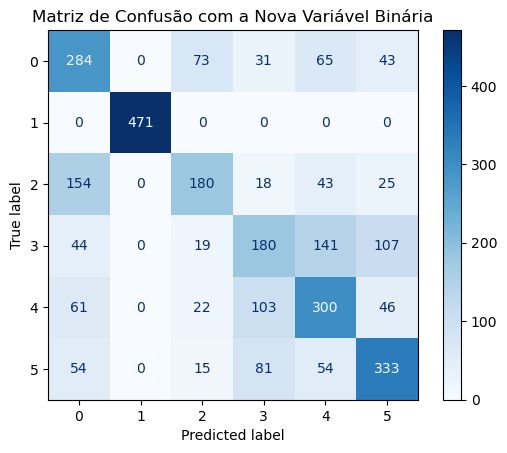

In [13]:
# Ajustar o modelo de árvore de decisão com a nova variável
melhor_modelo_com_nova_variavel = DecisionTreeClassifier(ccp_alpha=0.0002394476959803082, min_samples_leaf=20)
melhor_modelo_com_nova_variavel.fit(X_train, y_train)

# Fazer previsões na base de teste
y_pred_nova = melhor_modelo_com_nova_variavel.predict(X_test)

# Calcular a nova acurácia
accuracy_nova = accuracy_score(y_test, y_pred_nova)
print(f"Acurácia na base de teste com a nova variável: {accuracy_nova:.2f}")

# Exibir a nova matriz de confusão
conf_matrix_nova = confusion_matrix(y_test, y_pred_nova)
disp_nova = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_nova)
disp_nova.plot(cmap='Blues')
plt.title("Matriz de Confusão com a Nova Variável Binária")
plt.show()



Este código ajusta o modelo de árvore de decisão incluindo a nova variável binária que sinaliza a classe de maior erro. Em seguida, ele faz previsões na base de teste e calcula a nova acurácia, que subiu para 0,59, indicando uma melhora em relação à versão anterior. A matriz de confusão mostra a distribuição das classificações corretas e incorretas entre as classes, destacando como o modelo está se saindo na identificação das diferentes atividades. A nova variável parece ter ajudado o modelo a melhorar o reconhecimento, especialmente para classes mais difíceis.

Acurácia do modelo simples na base de teste: 0.50


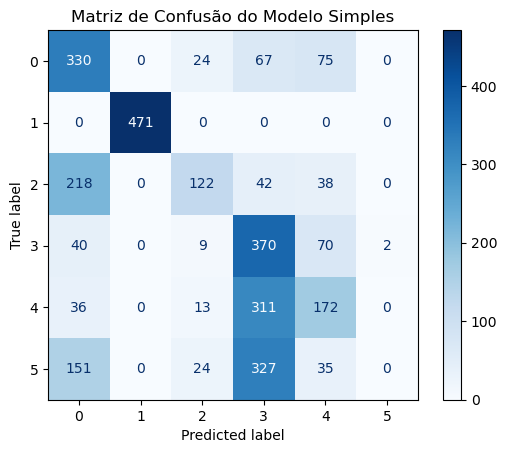

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

# Configurações do modelo
modelo_simples = DecisionTreeClassifier(min_samples_leaf=20, max_depth=4, random_state=42)

# Treinamento da árvore com todas as variáveis
modelo_simples.fit(X_train, y_train)

# Fazer previsões na base de teste
y_pred_simples = modelo_simples.predict(X_test)

# Calcular a acurácia do modelo simples
accuracy_simples = accuracy_score(y_test, y_pred_simples)
print(f"Acurácia do modelo simples na base de teste: {accuracy_simples:.2f}")

# Exibir a matriz de confusão para o modelo simples
conf_matrix_simples = confusion_matrix(y_test, y_pred_simples)
disp_simples = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_simples)
disp_simples.plot(cmap='Blues')
plt.title("Matriz de Confusão do Modelo Simples")
plt.show()


Este código construiu uma árvore de decisão simples para classificar a atividade humana, usando todas as variáveis com um mínimo de 20 amostras por folha e uma profundidade máxima de 4. A matriz de confusão mostra a precisão do modelo em cada classe, com a diagonal indicando as previsões corretas. A acurácia final foi de 50%, o que reflete um desempenho intermediário, indicando que o modelo teve sucesso moderado em classificar corretamente as atividades, mas ainda confunde algumas classes, especialmente a classe 2. Essa configuração simples ajuda a observar rapidamente a eficácia da árvore e as áreas de possível melhoria.

As 3 variáveis mais importantes são: Index(['classe_maior_erro', 'tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y'], dtype='object')
Acurácia com as 3 variáveis mais importantes: 0.50


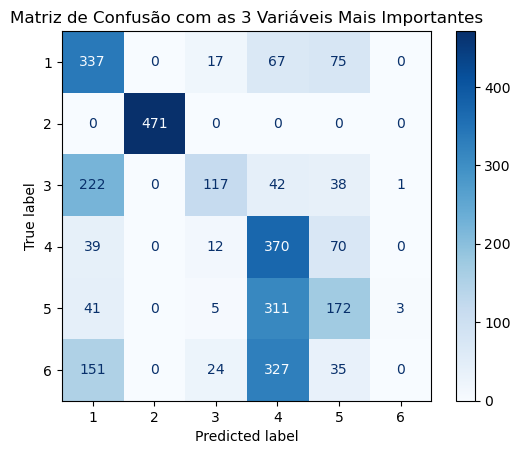

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Passo 1: Treinar uma árvore com todas as variáveis para identificar as mais importantes
modelo_completo = DecisionTreeClassifier(min_samples_leaf=20, max_depth=4)
modelo_completo.fit(X_train, y_train)

# Passo 2: Obter a importância das variáveis
importances = modelo_completo.feature_importances_

# Selecionar as 3 variáveis mais importantes
top_3_indices = importances.argsort()[-3:][::-1]  # Índices das 3 variáveis mais importantes
top_3_features = X_train.columns[top_3_indices]

print("As 3 variáveis mais importantes são:", top_3_features)

# Filtrar o conjunto de dados para usar apenas essas 3 variáveis
X_train_reduced = X_train[top_3_features]
X_test_reduced = X_test[top_3_features]

# Passo 3: Treinar uma nova árvore de decisão com as 3 variáveis mais importantes
modelo_reduzido = DecisionTreeClassifier(min_samples_leaf=20, max_depth=4)
modelo_reduzido.fit(X_train_reduced, y_train)

# Passo 4: Avaliar a acurácia com as 3 variáveis selecionadas
y_pred_reduzido = modelo_reduzido.predict(X_test_reduced)
accuracy_reduzido = accuracy_score(y_test, y_pred_reduzido)
print(f"Acurácia com as 3 variáveis mais importantes: {accuracy_reduzido:.2f}")

# Exibir a matriz de confusão
conf_matrix_reduzido = ConfusionMatrixDisplay.from_estimator(modelo_reduzido, X_test_reduced, y_test, cmap='Blues')
plt.title("Matriz de Confusão com as 3 Variáveis Mais Importantes")
plt.show()


Neste código, selecionamos as três variáveis mais importantes e treinamos novamente uma árvore de decisão com profundidade limitada. A matriz de confusão mostra como o modelo classificou cada classe. As células na diagonal representam acertos, enquanto os valores fora da diagonal indicam erros de classificação. Com as três variáveis mais relevantes, o modelo conseguiu uma boa separação das classes principais, mas ainda comete alguns erros, especialmente nas classes mais difíceis de distinguir.